In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Import CSV and create a DataFrame 
file = "Output/CleanedSpeed.csv"
main_df = pd.read_csv(file, encoding="ISO-8859-1")
main_df

,Unique ID,Gender,Wave,Match,Same Race,Age of Partner,Race of Partner,Dates Per Week,Outings Per Week,Partner Preference Attractive,...,Own Rating Ambition,Decision,Estimation of Matches,Number of Dates,Your Preference Attractive Post-Date,Your Preference Sincere Post-Date,Your Preference Intelligence Post-Date,Your Preference Fun Post-Date,Your Preference Ambition Post-Date,Your Preference Shared Interests Post-Date
0,1,Female,1,No,No,27.0,White,7.0,1.0,35.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
1,1,Female,1,No,No,22.0,White,7.0,1.0,60.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
2,1,Female,1,Yes,Yes,22.0,Asian,7.0,1.0,19.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
3,1,Female,1,Yes,No,23.0,White,7.0,1.0,30.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
4,1,Female,1,Yes,No,24.0,Latino,7.0,1.0,30.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,552,Male,21,No,No,26.0,Latino,2.0,1.0,10.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6812,552,Male,21,No,No,24.0,Other,2.0,1.0,50.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6813,552,Male,21,No,No,29.0,Latino,2.0,1.0,40.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6814,552,Male,21,No,No,22.0,Asian,2.0,1.0,10.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0


In [72]:
#getting the mean of dates per week by gender

dates_df = pd.DataFrame(main_df.groupby('Gender')['Dates Per Week'].mean())
dates_df


,Dates Per Week
Gender,
Female,5.230815
Male,4.800000


In [96]:
decision_yes = main_df.loc[main_df['Decision']=='Yes']

decision_df = pd.DataFrame(decision_yes.groupby(['Unique ID']).count()['Decision'])
    
decision_df.rename(columns={'Decision':'Yes Decision'}, inplace = True)

decision_df



,Yes Decision
Unique ID,
1,8
2,4
4,3
5,6
6,6
...,...
548,9
549,9
550,7


In [97]:
helper_df = pd.merge(main_df, decision_df, on=['Unique ID'])
decision_mean_df = pd.DataFrame(helper_df.groupby('Gender')['Yes Decision'].mean())
decision_mean_df

,Yes Decision
Gender,
Female,6.776332
Male,7.800965


In [98]:
dating_decision_df = pd.merge(dates_df, decision_mean_df, on=['Gender'])
dating_decision_df

,Dates Per Week,Yes Decision
Gender,,
Female,5.230815,6.776332
Male,4.800000,7.800965


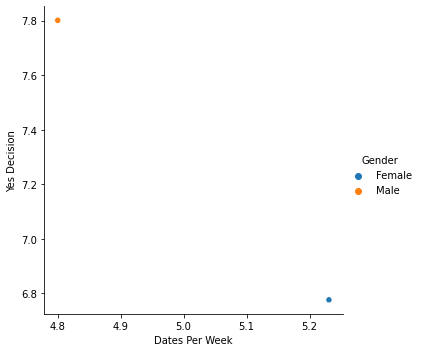

In [95]:
int_plot = sns.relplot(
    data=dating_decision_df,
    x="Dates Per Week", y="Yes Decision", hue = "Gender"
)

In [100]:
uniq_dates_mean = pd.DataFrame(main_df.groupby('Unique ID')['Dates Per Week'].mean())
uniq_dates_mean 

,Dates Per Week
Unique ID,
1,7.0
2,5.0
3,3.0
4,5.0
5,4.0
...,...
548,6.0
549,7.0
550,4.0


In [103]:
uniq_decision_mean = pd.DataFrame(helper_df.groupby('Unique ID')['Yes Decision'].mean())
uniq_decision_mean

,Yes Decision
Unique ID,
1,8
2,4
4,3
5,6
6,6
...,...
548,9
549,9
550,7


In [106]:
uniq_dating_decision = pd.merge(uniq_dates_mean, uniq_decision_mean, on=['Unique ID'])
uniq_dating_decision

,Dates Per Week,Yes Decision
Unique ID,,
1,7.0,8
2,5.0,4
4,5.0,3
5,4.0,6
6,3.0,6
...,...,...
548,6.0,9
549,7.0,9
550,4.0,7


In [108]:
#Merging the Uniq_Dating_Decision_df to main_df 

DatingvsDecision_df =  pd.merge(main_df, uniq_dating_decision, on=['Unique ID'])
DatingvsDecision_df

,Unique ID,Gender,Wave,Match,Same Race,Age of Partner,Race of Partner,Dates Per Week_x,Outings Per Week,Partner Preference Attractive,...,Estimation of Matches,Number of Dates,Your Preference Attractive Post-Date,Your Preference Sincere Post-Date,Your Preference Intelligence Post-Date,Your Preference Fun Post-Date,Your Preference Ambition Post-Date,Your Preference Shared Interests Post-Date,Dates Per Week_y,Yes Decision
0,1,Female,1,No,No,27.0,White,7.0,1.0,35.0,...,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8
1,1,Female,1,No,No,22.0,White,7.0,1.0,60.0,...,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8
2,1,Female,1,Yes,Yes,22.0,Asian,7.0,1.0,19.0,...,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8
3,1,Female,1,Yes,No,23.0,White,7.0,1.0,30.0,...,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8
4,1,Female,1,Yes,No,24.0,Latino,7.0,1.0,30.0,...,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,552,Male,21,No,No,26.0,Latino,2.0,1.0,10.0,...,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0,2.0,7
6464,552,Male,21,No,No,24.0,Other,2.0,1.0,50.0,...,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0,2.0,7
6465,552,Male,21,No,No,29.0,Latino,2.0,1.0,40.0,...,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0,2.0,7
6466,552,Male,21,No,No,22.0,Asian,2.0,1.0,10.0,...,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0,2.0,7


In [109]:
#drop all rows but the one to isolate a single Unique ID and their Dates Per Week vs Total Decisions

DatingvsDecision_df.drop_duplicates(subset="Unique ID",keep="first", inplace=True)

DatingvsDecision_df

,Unique ID,Gender,Wave,Match,Same Race,Age of Partner,Race of Partner,Dates Per Week_x,Outings Per Week,Partner Preference Attractive,...,Estimation of Matches,Number of Dates,Your Preference Attractive Post-Date,Your Preference Sincere Post-Date,Your Preference Intelligence Post-Date,Your Preference Fun Post-Date,Your Preference Ambition Post-Date,Your Preference Shared Interests Post-Date,Dates Per Week_y,Yes Decision
0,1,Female,1,No,No,27.0,White,7.0,1.0,35.0,...,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8
10,2,Female,1,No,Yes,27.0,White,5.0,1.0,35.0,...,3.0,NaN,30.0,5.0,40.0,15.0,0.0,10.0,5.0,4
20,4,Female,1,No,Yes,27.0,White,5.0,1.0,35.0,...,2.0,NaN,20.0,20.0,20.0,20.0,0.0,20.0,5.0,3
30,5,Female,1,No,Yes,27.0,White,4.0,1.0,35.0,...,NaN,NaN,30.0,10.0,20.0,20.0,10.0,10.0,4.0,6
40,6,Female,1,No,No,27.0,White,3.0,1.0,35.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,548,Male,21,Yes,No,28.0,Asian,6.0,1.0,10.0,...,5.0,NaN,40.0,10.0,20.0,10.0,0.0,20.0,6.0,9
6380,549,Male,21,No,No,28.0,Asian,7.0,1.0,10.0,...,3.0,NaN,30.0,10.0,20.0,30.0,5.0,5.0,7.0,9
6402,550,Male,21,No,No,28.0,Asian,4.0,1.0,10.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7
6424,551,Male,21,No,No,28.0,Asian,6.0,3.0,10.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8


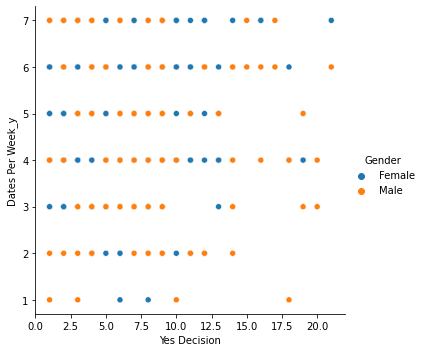

In [118]:
int_plot = sns.relplot(
    data=DatingvsDecision_df,
    x="Yes Decision", y="Dates Per Week_y", hue="Gender",
)

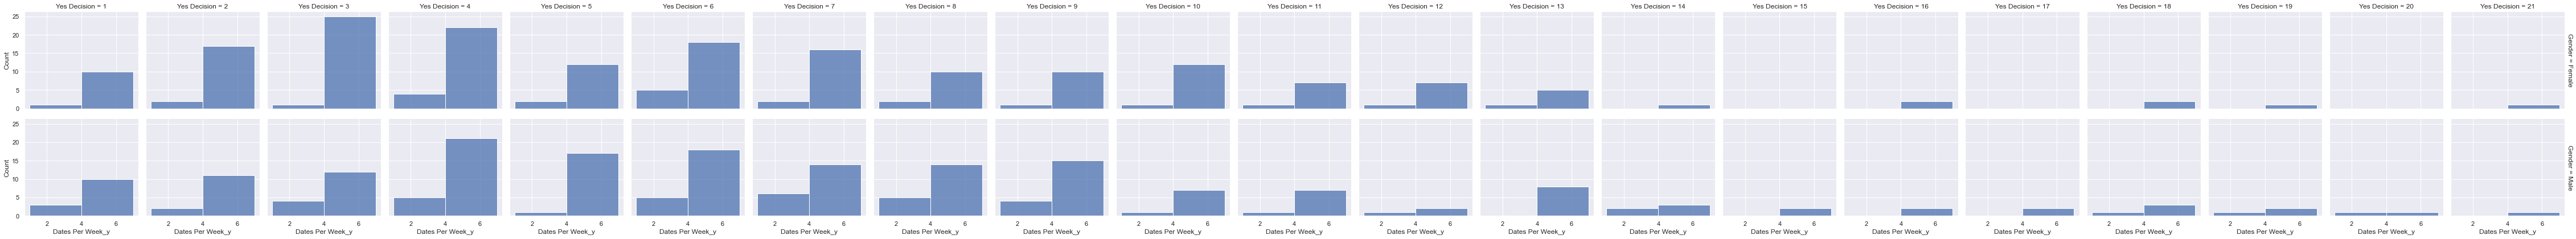

In [123]:
sns.set_theme(style="darkgrid")

sns.displot(
    DatingvsDecision_df, x="Dates Per Week_y", col="Yes Decision", row="Gender",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

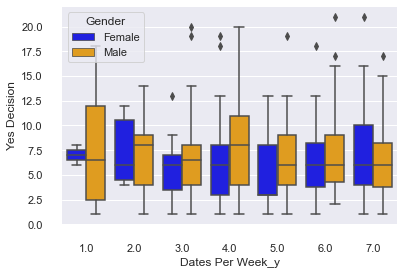

In [140]:
sns.boxplot(x="Dates Per Week_y", y="Yes Decision",
            hue="Gender", palette=["blue", "orange"],
            data=DatingvsDecision_df)
sns.despine(offset=10, trim=True)

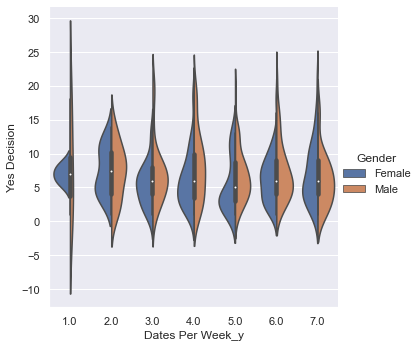

In [128]:
sns.catplot(data=DatingvsDecision_df, kind="violin", x="Dates Per Week_y", y="Yes Decision", hue="Gender", split=True)

C:\Users\erdos\anaconda3\envs\pythondata\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\erdos\anaconda3\envs\pythondata\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\erdos\anaconda3\envs\pythondata\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\erdos\anaconda3\envs\pythondata\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


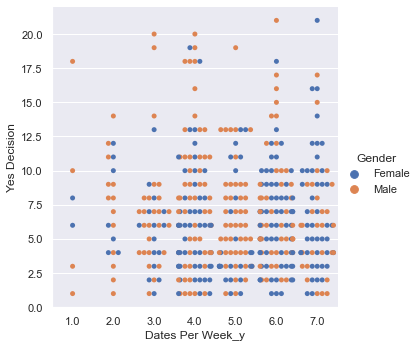

In [126]:
sns.catplot(data=DatingvsDecision_df, kind="swarm", x="Dates Per Week_y", y="Yes Decision", hue="Gender")

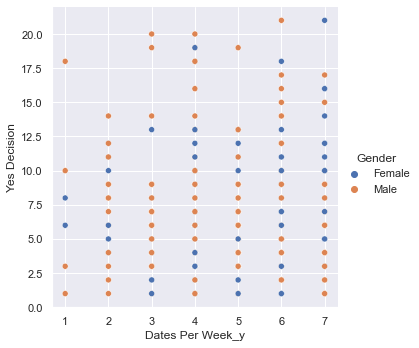

In [127]:
sns.relplot(
    data=DatingvsDecision_df,
    x="Dates Per Week_y", y="Yes Decision", hue="Gender"
)